Problem:Time Series Analysis of Sparkling Wine Sales

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv and Rose.csv

Please do perform the following questions on each of these two data sets separately.

 Loading packages & basic +dates

In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
# Statistics
from statsmodels.distributions.empirical_distribution import ECDF
# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read the files ,by providing the index_col as Year-Month'

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Greatlearning_PGPDSBA (Rivision)/Time series/times eries arimax sarimax  end to end case study /Time series project_wine sales/Sparkling.csv',parse_dates = True, index_col = 0)

First Top and Bottom five Rows of data set

In [3]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [4]:
df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


Now, we have our data ready for the Time Series Analysis.

In [5]:
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

Date-Time index:187 entries ,1980-01-01 to 1995-07-01

In [6]:
print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  187 
The number of columns:  1


Data has 210 rows and 7 features

#Lets check the data type of different variables present in dataset.

In [7]:
df.dtypes

Sparkling    int64
dtype: object

#Check the basic measures of descriptive statistics of the Time Series

In [8]:
round(df.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


The mean value is 2402.41 ,median is 1874 and the range value comes to be 6171

In [9]:
print('We have around',187/12,'year of data.')

We have around 15.583333333333334 year of data.


#Missing value check

In [10]:
df.isnull().sum()

Sparkling    0
dtype: int64

There are 187 data points ,with no missing values and 'Sparkling' is variables is of integer datatype.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


##Exploratory Data Analysis

#Univariate Time Series Analysis
A univariate time series is a series with single-time stamped variable at time t . Here the dataset belongs to the Sparkling Wine sales from the January of 1980 to July of 1995 .Here Sparkling wine is time -dependent variable. The series is a monthly series ,wherein for each month between Jan -1980 and July -1995 a datapoint is recorded.

#Plot ECDF: Empirical Cumulative Distribution Function

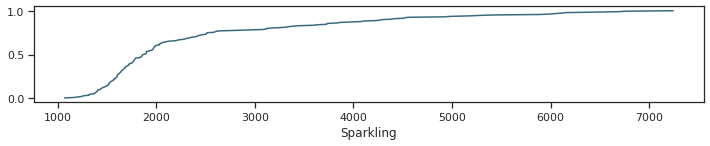

In [12]:
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sparkling');

An ECDF plot is an estimator of the Cumulative Distribution Function .The ECDF essentially allows you to plot a feature of data in order from least to greatest and see the whole feature as if it is distributedacross the data set .The dataranges from 1070 to 7242.

#Plot the Time Series to understand the behaviour of the data. Time series plot and stationarity Let us plot the time series for an initial analysis.

#Plot the Time Series to understand the behaviour of the data

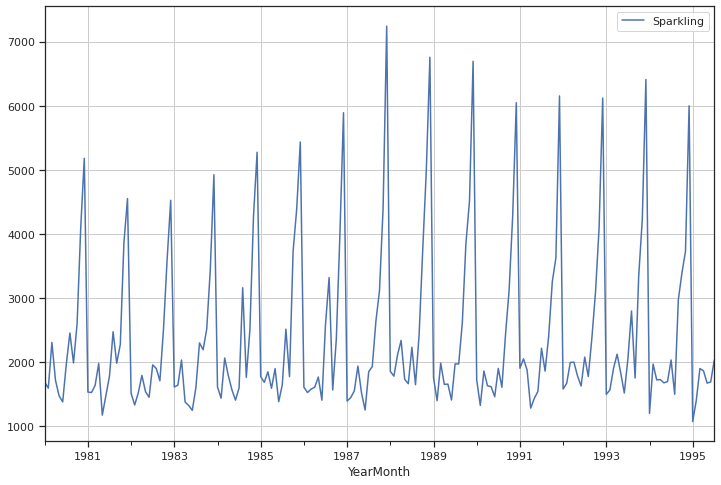

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df.plot()
plt.grid();

Suppose we predict the Sparkling for the next few months ,we will look t the past sales values and try to guage and extract a pattern . Here ,we observe a pattern within each year indicating a seasonal effect .``Such observations will help us in predicting future values . Note:We have used only one variable ,Sparkling (Sparkling sales of past 15 years ). Hence ,this is the univariate Time series Analysis /Forecasting . Trend might be absent but a Seasonal effect looks to be present .These can be inferred from the plot .

There seems to be no trend but seasonality can be seen here.

##Box plot per year wise

Plot a boxplot to understand the spread of sales across different years and within different months across years. Yearly Boxplot

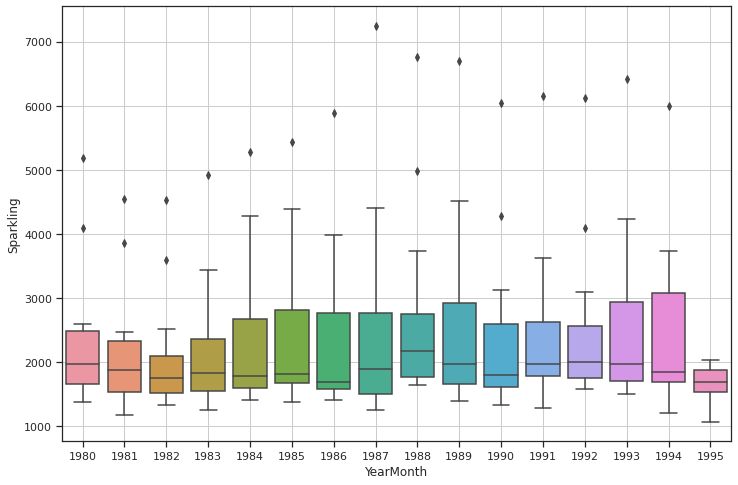

In [14]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

Across the year ,there are not much noticeable difference,though there are few high ranges in middle years .Also the last year is showing less sale due to the fact that the data is recorded for 7 out of 12 months in year 1995

##Boxplot per month wise(Monthly Boxplot)

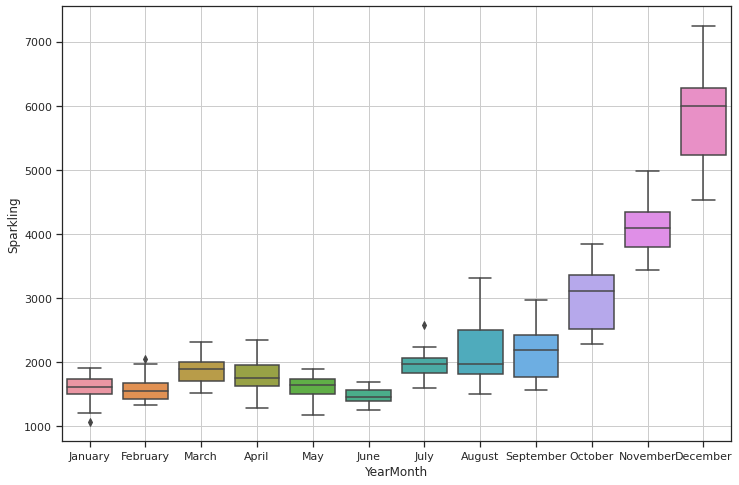

In [15]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

There is a maximum sale in month of  November & December.These fluctuations can be attributed to the months being the holiday month or months .June shows the minimum sale . Do remember that there is one less observation for few months in the year 1995. We can a see a seaonality effect with a cycle of 12 months.

There is a clear distinction of 'Sparkling wines sales' within different months spread across various years.
Inferences: The Sparkling wine sales have been increasing in the winter season every year. December are the peak month for Sparkling Wine sales and the variance and the mean value for those months are also much higher than any of the other months. We can see a seasonal effect with a cycle of 12 months.

##Plot a graph of monthly sales across years

Year -Month sales table

In [16]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


Post July 1995 there is no data points for 1995 year .

#Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

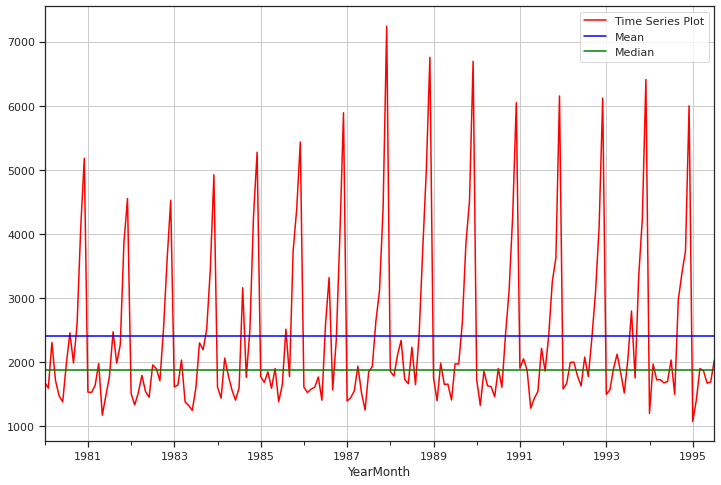

In [17]:
df.plot(color='Red')
plt.axhline(df['Sparkling'].mean(),color='Blue')
plt.axhline(df['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

# Yearly sale comparision of Sparkling wine using barplot

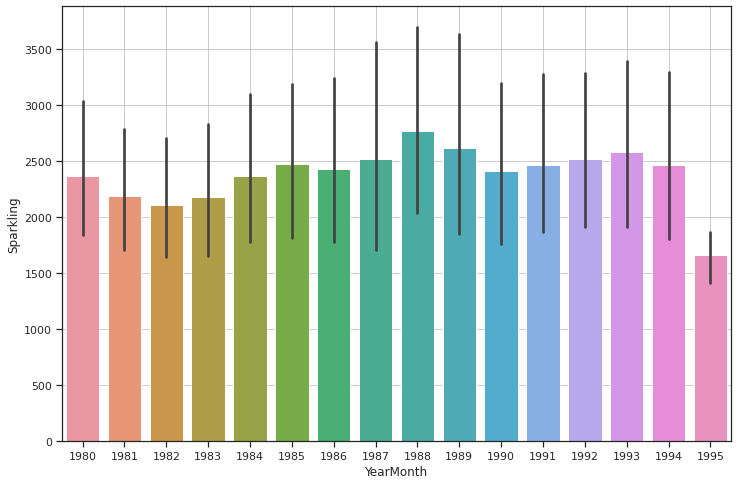

In [18]:
sns.barplot(df.index.year,df.Sparkling,data=df)
plt.grid();

#Month plot for each month distribution

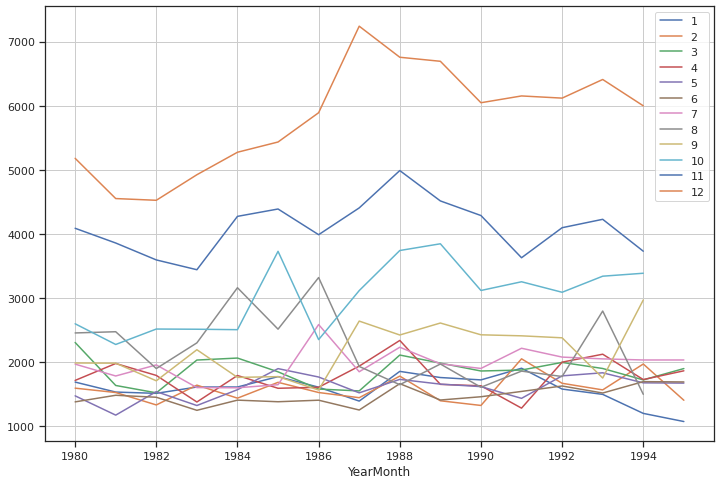

In [19]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that December has the highest sales across years.

As previously seen Month of December is outperforming for almost everyyear and it is another indicator that there is high out of seasonal sale in Oct-Dec.

#Plot the average Sparkling Sales per month and the month on month percentage change of Sparkling Sales

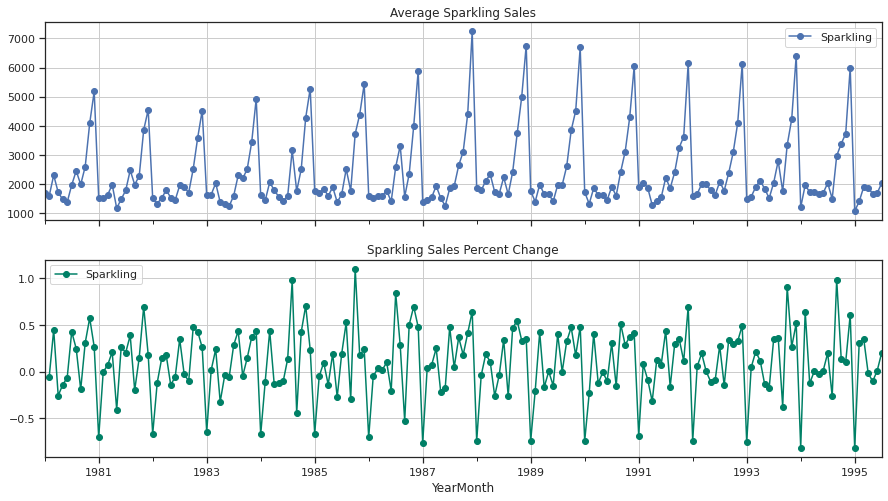

In [20]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

The above two graphs tells us the Average ' Sparkling Sales' and the Percentage change of 'Sparkling Sales' with respect to the time.It shows lot of seasonal variation every year .

## Time Series Decomposition

# Additive Decomposition (Sparkling Wine)

An additive model suggest that the components are added together . An additive model is linear where the changes over time are consistently added by the same amount .The seasonal correction is added with the Trend . A linear seasonality has the same frequency (width of the cycles) and amplitude(heightof the cycles).

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

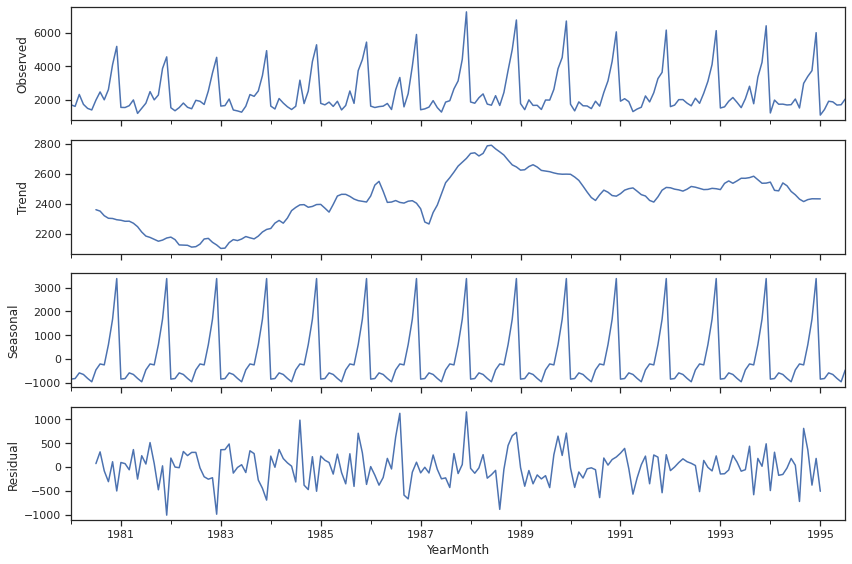

In [22]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: Sparkling, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.35

##Multiplicative Decomposition-(Sparkling Wine)

A multiplicative model suggest that the components are multiplied together . A multiplicative model is non-linear The seasonal correction is multiplied with the trend. A non-linear seasonality has an increasing or decreasing frequency (widh of cycles ) and or amplitude (height of the cycles) over time.

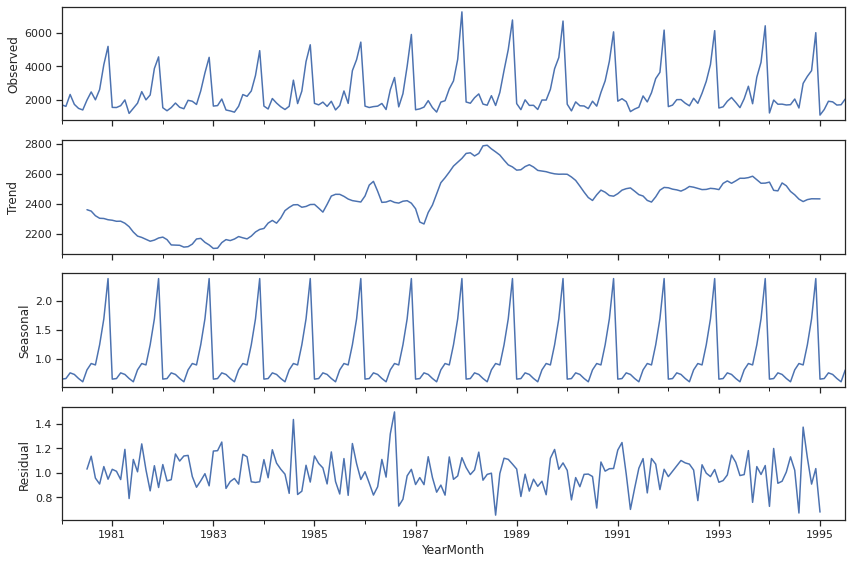

In [24]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative',freq=12)
decomposition.plot();
# For the multiplicative series, we see that a lot of residuals are located around 1.

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: Sparkling, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name:

Closer look at the trend in data set
There is an upward trend in the initial half which seems to be reach at a peak and then move in downward position .This will help in the forecast as in the most recent time it seems to have downward trend.

Inference:Hence we can say sparking wine time series show additive decomposition as errors patterns are almost similar to additive decomposition .

## Train -Test Split 

Split the data into train and test set .
Build different time sewroies models on train dataset and test data set Compare the models performances

The test data begins 1991 onwards .
Anything before 1991 can considered in the training data so long they are contigous .

In [26]:
train    =   df[0:int(len(df)*0.71)] 
test     =   df[int(len(df)*0.71):]

In [27]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


First few rows of Training Data & Testing data 

In [28]:
from IPython.display import display

In [29]:
print('First few rows of Training Data')
display(train.head())
# print('Last few rows of Training Data')
# display(train.tail())
print('First few rows of Test Data')
display(test.head())
# print('Last few rows of Test Data')
# display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


##Joint point for train and test data set

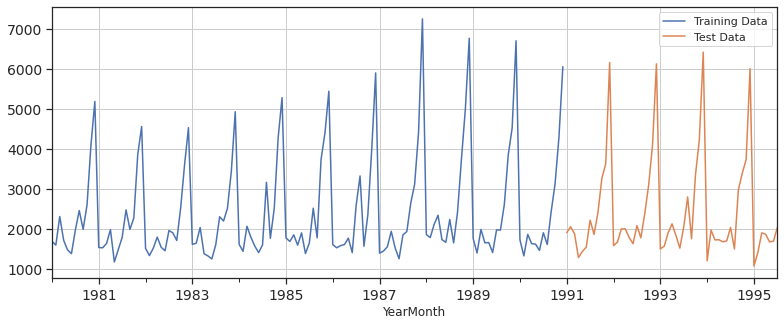

In [30]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years

#Building different models and comparing the accuracy metrics

#Model 1: Build a Linear Regression using the Time Stamped order of sparkling wine sales

Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.
Here time is independent variable and sparkling is dependent variable .

In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)


Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


Back up of orginal data 

In [32]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()


Adding new column train time and test time to data.

In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)
# [[]] is used to allign newly created column as dataframe object(format allignment) .


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Model 1 Plot-Linear regression

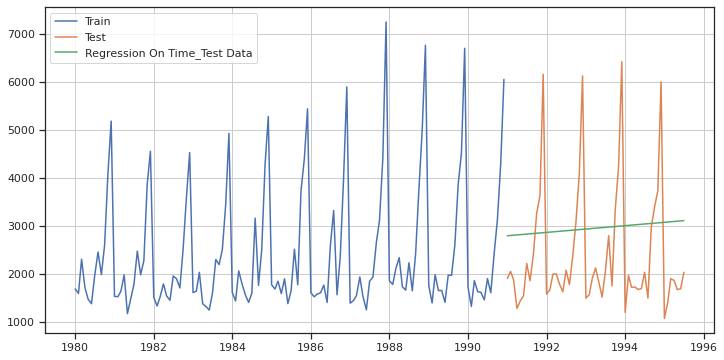

In [37]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(12,6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#Defining the accuracy metrics

In [38]:
from sklearn import metrics

## Test Data - RMSE

In [39]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [40]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


For Regression Model the forecast on Train data ,RMSE is 1279.32 For Regression Model the forecast on Test Data ,RMSE is 1389.13

#Model 2-Naive Model

For this particular Naive approach, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tommorow and since the prediction of tommorow is same as today .So the prediction for day after tomorrow is also today .

In [41]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [42]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

Model 2 Plot-Naive Approach

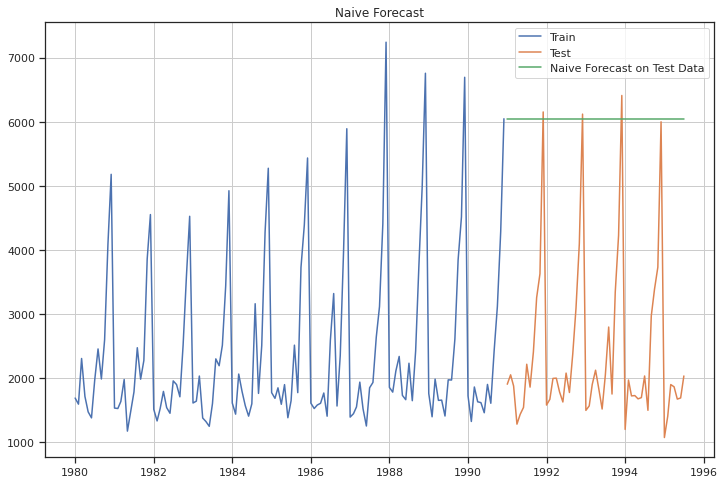

In [43]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#Model Evaluation -Naive Approach

In [44]:
## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [45]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


Model 2 Evaluation -Naive For Naive Model forcast on Test Data :RMSE is 3864 We can infer from the plot and RMSE values that the Linear Regression and naive Method on time model might not be suited for data set with high variability .

#Model 3: Simple Average

For this particular simple average method ,we will forecast by using the average of the training data .

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


Model 3 Plot -Simple Average

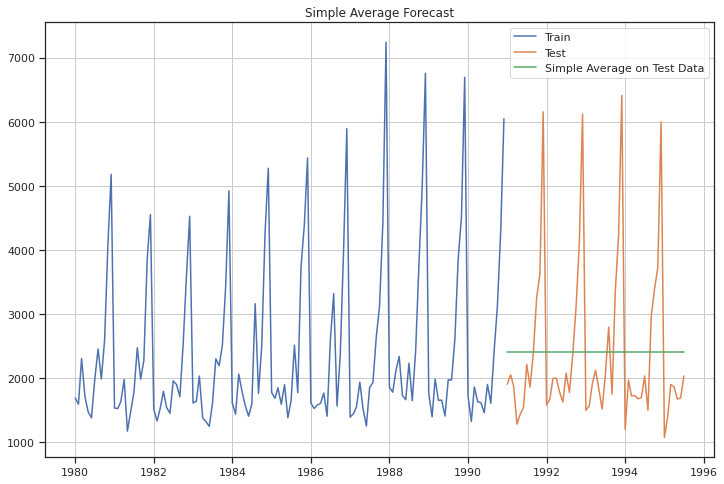

In [48]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model 3 Evaluation-Simple Average

In [49]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [50]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


#Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data

In [51]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Trailing moving averages

In [52]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


#Model 4 Plot -Moving Average

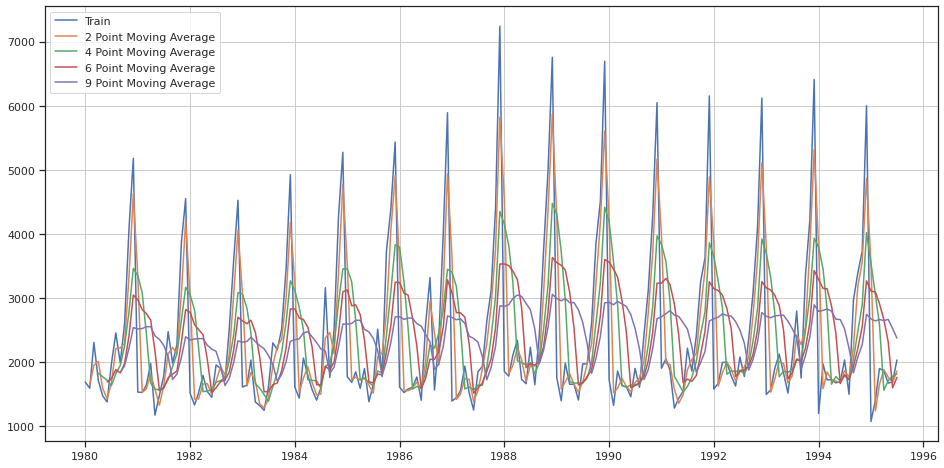

In [53]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.
Here 2 point moving average is replicatig the test data .

In [54]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

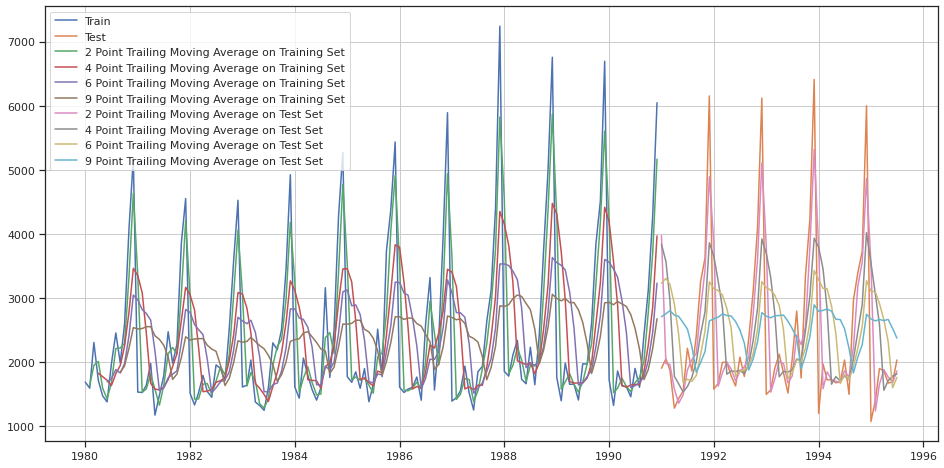

In [55]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

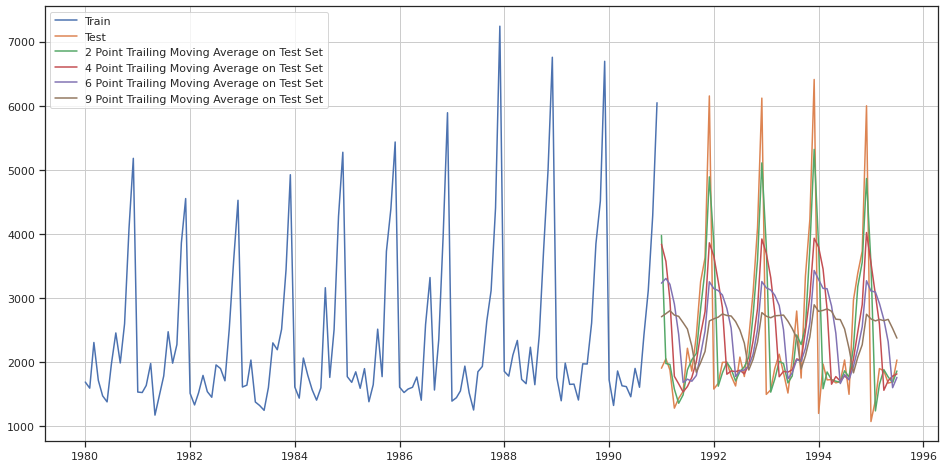

In [56]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();
# Visualizing separately for test set 

In [57]:
## Test Data - RMSE  --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))
# Out of all 2 point moving average seems better. 

For 2 point Moving Average Model forecast on the Training Data, RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


#Model 4 Evaluation-Moving Average

In [58]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots

# Plot all threes Simple average ,Naive approach and moving average model together and compare the time series plots.

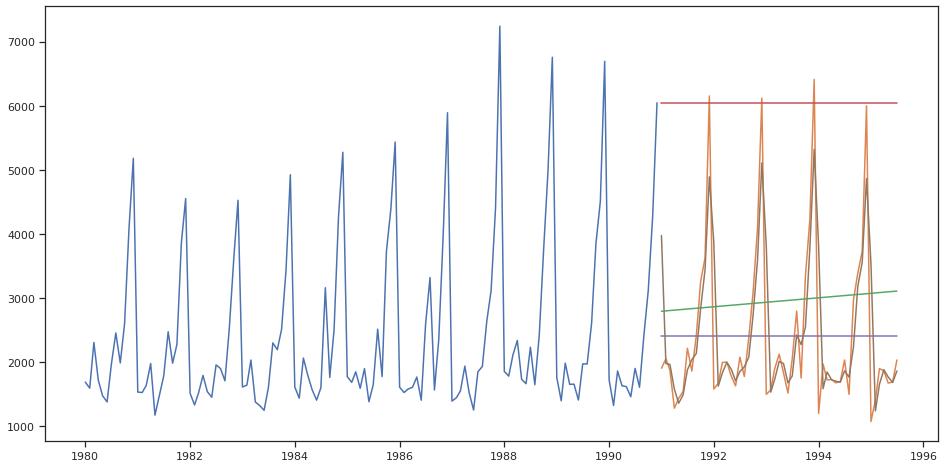

In [59]:
## Plotting on both Training and Test data
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

Build a Simple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

## Exponential Models

#Model 5:Simple Exponential Model 

In [60]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [61]:
SES_train = train.copy()
SES_test = test.copy()

In [62]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [63]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

## Model 5 Auto Fit Parameters

In [64]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 2403.7828696439005,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.0,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [65]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-01-01    2403.78287
1991-02-01    2403.78287
1991-03-01    2403.78287
1991-04-01    2403.78287
1991-05-01    2403.78287
1991-06-01    2403.78287
1991-07-01    2403.78287
1991-08-01    2403.78287
1991-09-01    2403.78287
1991-10-01    2403.78287
1991-11-01    2403.78287
1991-12-01    2403.78287
1992-01-01    2403.78287
1992-02-01    2403.78287
1992-03-01    2403.78287
1992-04-01    2403.78287
1992-05-01    2403.78287
1992-06-01    2403.78287
1992-07-01    2403.78287
1992-08-01    2403.78287
1992-09-01    2403.78287
1992-10-01    2403.78287
1992-11-01    2403.78287
1992-12-01    2403.78287
1993-01-01    2403.78287
1993-02-01    2403.78287
1993-03-01    2403.78287
1993-04-01    2403.78287
1993-05-01    2403.78287
1993-06-01    2403.78287
1993-07-01    2403.78287
1993-08-01    2403.78287
1993-09-01    2403.78287
1993-10-01    2403.78287
1993-11-01    2403.78287
1993-12-01    2403.78287
1994-01-01    2403.78287
1994-02-01    2403.78287
1994-03-01    2403.78287
1994-04-01    2403.78287


#Model Evaluation for α = 2403  : Simple Exponential Smoothing

In [66]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.082


In [67]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=2403:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=2403:SimpleExponentialSmoothing,1275.081813


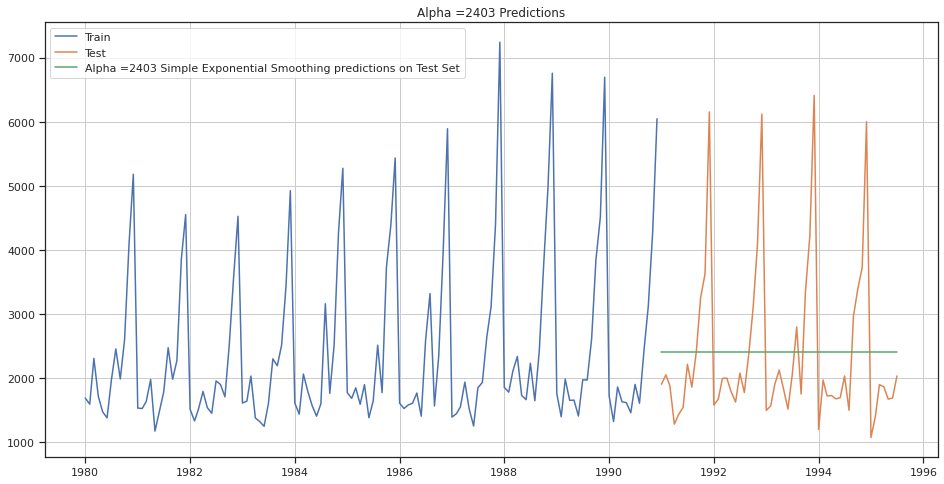

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model2, label='Alpha =2403 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =2403 Predictions');

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set

#Model 6- Double Exponential Smoothing model 

Two parameters α and β are estimated in this model. Level and Trend are accounted for in this model

In [69]:
DES_train = train.copy()
DES_test = test.copy()

In [70]:
model_DES = Holt(SES_train['Sparkling'])

In [71]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

## Model 6 Auto Fit Parameters

In [72]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.647814,True
smoothing_slope,beta,0.000000,True
initial_level,l.0,1686.082579,True
initial_slope,b.0,27.050136,True


In [73]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-01-01    5281.489091
1991-02-01    5308.539227
1991-03-01    5335.589363
1991-04-01    5362.639499
1991-05-01    5389.689635
1991-06-01    5416.739771
1991-07-01    5443.789907
1991-08-01    5470.840044
1991-09-01    5497.890180
1991-10-01    5524.940316
1991-11-01    5551.990452
1991-12-01    5579.040588
1992-01-01    5606.090724
1992-02-01    5633.140860
1992-03-01    5660.190996
1992-04-01    5687.241133
1992-05-01    5714.291269
1992-06-01    5741.341405
1992-07-01    5768.391541
1992-08-01    5795.441677
1992-09-01    5822.491813
1992-10-01    5849.541949
1992-11-01    5876.592086
1992-12-01    5903.642222
1993-01-01    5930.692358
1993-02-01    5957.742494
1993-03-01    5984.792630
1993-04-01    6011.842766
1993-05-01    6038.892902
1993-06-01    6065.943039
1993-07-01    6092.993175
1993-08-01    6120.043311
1993-09-01    6147.093447
1993-10-01    6174.143583
1993-11-01    6201.193719
1993-12-01    6228.243855
1994-01-01    6255.293991
1994-02-01    6282.344128
1994-03-01  

In [74]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3850.780


In [75]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.64,Beta=0:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=2403:SimpleExponentialSmoothing,1275.081813
"Alpha=0.64,Beta=0:DoubleExponentialSmoothing",3850.779835


# Model 7-Triple Exponential Smoothing model

Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters α, β and γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [76]:
TES_train = train.copy()
TES_test = test.copy()

In [77]:
model_TES = ExponentialSmoothing(SES_train['Sparkling'],trend='additive',seasonal='multiplicative')

In [78]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

## Model 7 Auto Fit Parameters

In [79]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 1639.9993399027126,
 'initial_seasons': array([1.00841739, 0.96899632, 1.24171643, 1.13206069, 0.93984119,
        0.93813873, 1.22454059, 1.54419134, 1.27332629, 1.63190096,
        2.4826116 , 3.11820572]),
 'initial_slope': 4.884660841988308,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.15443784802011637,
 'smoothing_seasonal': 0.37116865308973673,
 'smoothing_slope': 7.4133171248060435e-28,
 'use_boxcox': False}

In [80]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-01-01    1602.230902
1991-02-01    1374.018912
1991-03-01    1807.607439
1991-04-01    1704.811690
1991-05-01    1602.617906
1991-06-01    1415.709220
1991-07-01    1945.224617
1991-08-01    1910.645057
1991-09-01    2435.747876
1991-10-01    3334.197743
1991-11-01    4408.804412
1991-12-01    6329.946140
1992-01-01    1656.483176
1992-02-01    1420.412913
1992-03-01    1868.470383
1992-04-01    1762.052844
1992-05-01    1656.277636
1992-06-01    1462.978880
1992-07-01    2009.994251
1992-08-01    1974.087270
1992-09-01    2516.402744
1992-10-01    3444.299147
1992-11-01    4553.991795
1992-12-01    6537.828611
1993-01-01    1710.735451
1993-02-01    1466.806915
1993-03-01    1929.333327
1993-04-01    1819.293998
1993-05-01    1709.937367
1993-06-01    1510.248539
1993-07-01    2074.763885
1993-08-01    2037.529483
1993-09-01    2597.057612
1993-10-01    3554.400550
1993-11-01    4699.179178
1993-12-01    6745.711082
1994-01-01    1764.987725
1994-02-01    1513.200916
1994-03-01  

In [81]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 384.198


In [82]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.154,Beta=7.4133171248060435e-28,Gamma=0.371:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=2403:SimpleExponentialSmoothing,1275.081813
"Alpha=0.64,Beta=0:DoubleExponentialSmoothing",3850.779835
"Alpha=0.154,Beta=7.4133171248060435e-28,Gamma=0.371:TripleExponentialSmoothing",384.197750


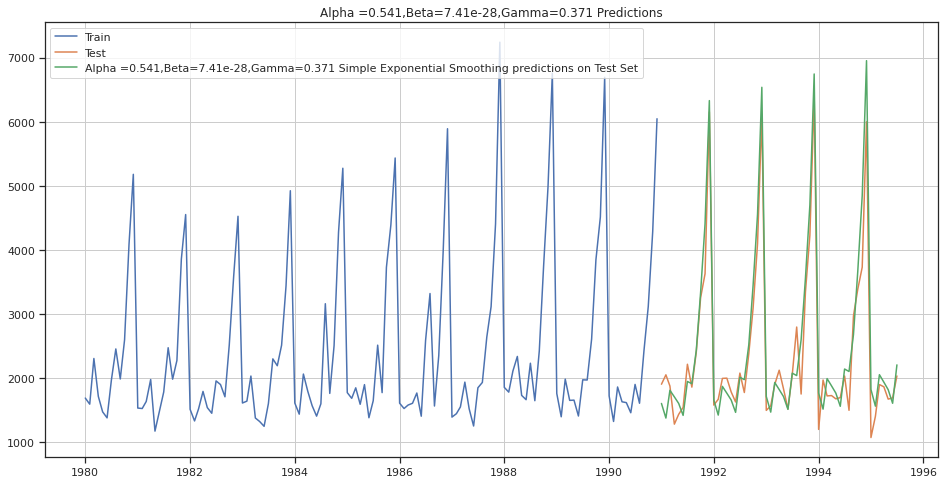

In [83]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model4, label='Alpha =0.541,Beta=7.41e-28,Gamma=0.371 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.541,Beta=7.41e-28,Gamma=0.371 Predictions');

#Which exponential model performs best?
Tweak the different parameters for each of these models and try to come up with a better accuracy (less RMSE and MAPE)

Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.3 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [84]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [85]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

Model Evaluation

In [86]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.3,1935.507132
1,0.4,2311.919615
2,0.5,2666.351413
3,0.6,2979.204388
4,0.7,3249.944092
5,0.8,3483.801006
6,0.9,3686.794285


In [87]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
0,0.3,1935.507132
1,0.4,2311.919615
2,0.5,2666.351413
3,0.6,2979.204388
4,0.7,3249.944092
5,0.8,3483.801006
6,0.9,3686.794285


In [88]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=2403:SimpleExponentialSmoothing,1275.081813
"Alpha=0.64,Beta=0:DoubleExponentialSmoothing",3850.779835
"Alpha=0.154,Beta=7.4133171248060435e-28,Gamma=0.371:TripleExponentialSmoothing",384.197750


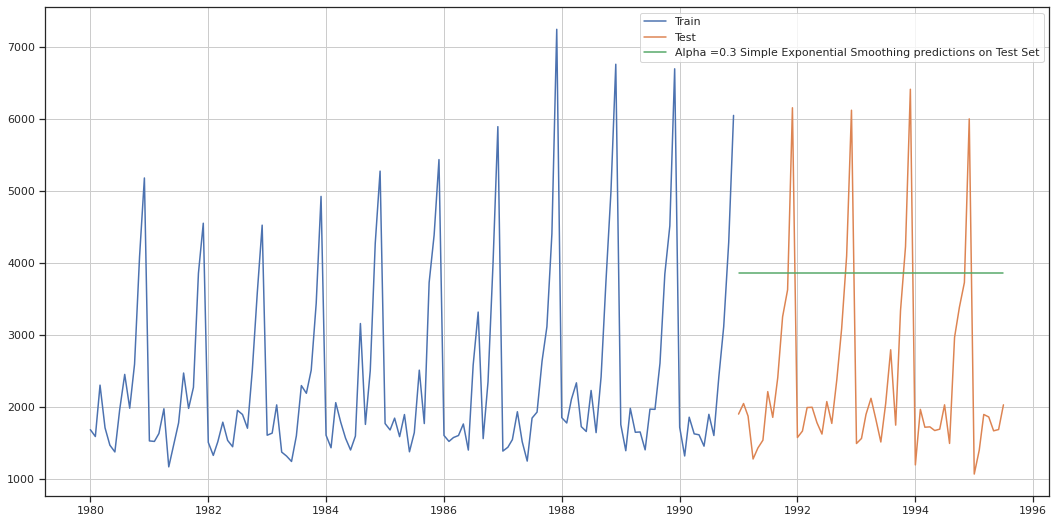

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

# plt.plot(SES_test['predict'], label='Alpha =2403 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.3 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [90]:
DES_train = train.copy()
DES_test = test.copy()

In [91]:
model_DES = Holt(DES_train['Sparkling'])

In [92]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [93]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [94]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.3,0.3,18259.110704
1,0.3,0.4,26069.841401
2,0.3,0.5,34401.512440
3,0.3,0.6,42162.748095
4,0.3,0.7,47832.397419
...,...,...,...
59,1.0,0.6,49327.087977
60,1.0,0.7,52655.765663
61,1.0,0.8,55442.273880
62,1.0,0.9,57823.177011


In [95]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
0,0.3,0.3,18259.110704
8,0.4,0.3,23878.496940
1,0.3,0.4,26069.841401
16,0.5,0.3,27095.532414
24,0.6,0.3,29070.722592
...,...,...,...
39,0.7,1.0,57297.154185
62,1.0,0.9,57823.177011
47,0.8,1.0,57990.117908
55,0.9,1.0,59008.254331


In [96]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.3 & Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=2403:SimpleExponentialSmoothing,1275.081813
"Alpha=0.64,Beta=0:DoubleExponentialSmoothing",3850.779835
"Alpha=0.154,Beta=7.4133171248060435e-28,Gamma=0.371:TripleExponentialSmoothing",384.197750


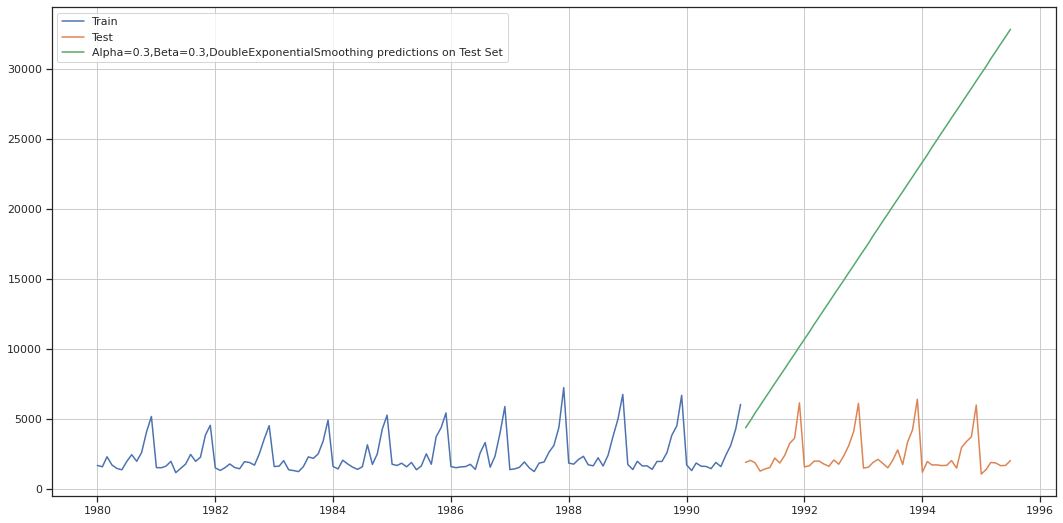

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict',0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.3 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command

In [98]:
TES_train = train.copy()
TES_test = test.copy()

In [99]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [100]:
for i in np.arange(0.3,1,0.1):
    for j in np.arange(0.3,1,0.1):
        for k in np.arange(0.3,1.,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [101]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.3,0.3,0.3,3.927862e+02
1,0.3,0.3,0.4,9.513202e+02
2,0.3,0.3,0.5,1.470487e+03
3,0.3,0.3,0.6,2.181724e+03
4,0.3,0.3,0.7,3.513351e+03
...,...,...,...,...
338,0.9,0.9,0.5,6.933059e+05
339,0.9,0.9,0.6,2.666257e+07
340,0.9,0.9,0.7,9.717767e+05
341,0.9,0.9,0.8,8.236733e+05


In [102]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.3,0.3,0.3,3.927862e+02
7,0.3,0.4,0.3,4.108545e+02
50,0.4,0.3,0.4,4.214092e+02
231,0.7,0.8,0.3,5.181888e+02
100,0.5,0.3,0.5,5.421755e+02
...,...,...,...,...
290,0.8,0.9,0.6,9.906908e+06
332,0.9,0.8,0.6,1.525672e+07
339,0.9,0.9,0.6,2.666257e+07
320,0.9,0.6,0.8,2.880757e+07


In [103]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=2403:SimpleExponentialSmoothing,1275.081813
"Alpha=0.64,Beta=0:DoubleExponentialSmoothing",3850.779835
"Alpha=0.154,Beta=7.4133171248060435e-28,Gamma=0.371:TripleExponentialSmoothing",384.197750


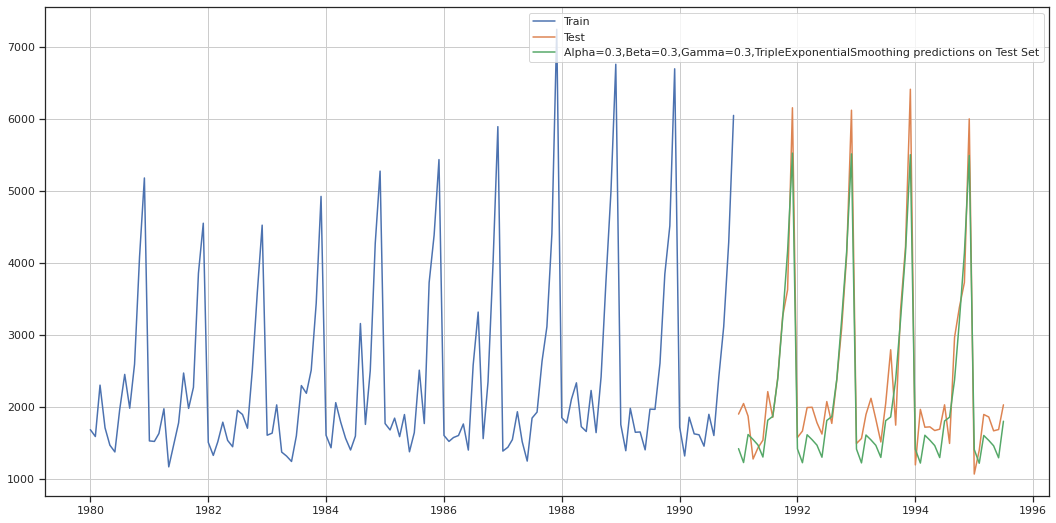

In [104]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3,0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).

The models to be built on the whole data are the following:

Alpha=0.154,Beta=7.41e-28,Gamma=0.371,TripleExponentialSmoothing

In [105]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.154,
                                                                 smoothing_slope=7.41e-28,
                                                                 smoothing_seasonal=0.371)

In [106]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 353.88180604646135


In [107]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

Lets apply Brute Force Triple Exponential Smoothing on Full data .
The best found parameters for Triple Exponential Smoothing are Alpha=0.541,Beta=7.41e-28,Gamma=0.371

## Plot for Best Next 12 month Forecast

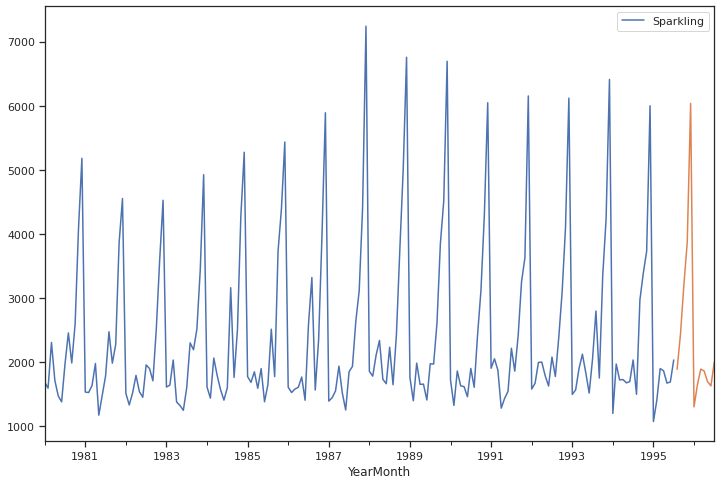

In [108]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [109]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1189.909253,1885.249177,2580.589100
1995-09-01,1739.100148,2434.440072,3129.779996
1995-10-01,2503.727698,3199.067622,3894.407546
1995-11-01,3173.521740,3868.861664,4564.201588
1995-12-01,5340.920119,6036.260042,6731.599966


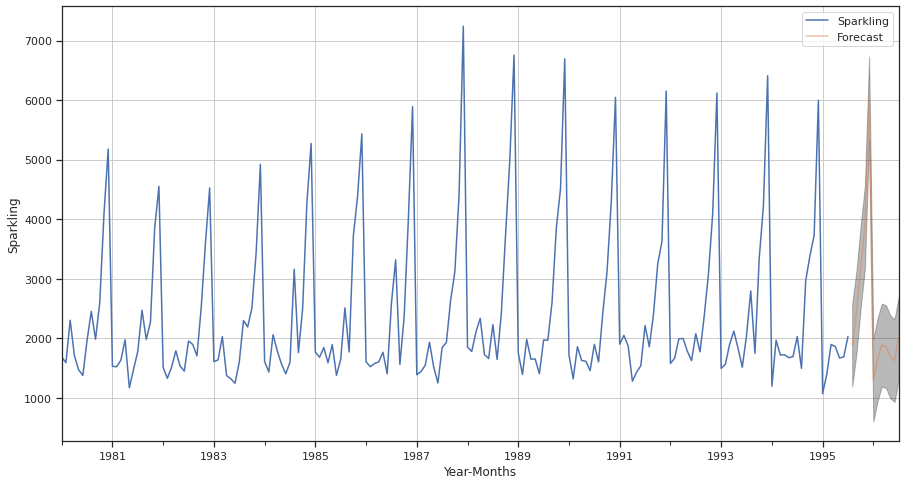

In [110]:
# plot the forecast along with the confidence band
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.3)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

# ACF & PACF Plot

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.Let us look at the ACF and the PACF plots once more.

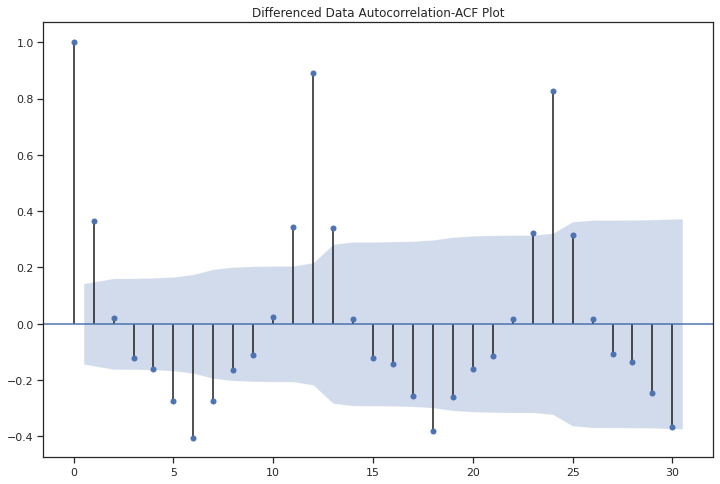

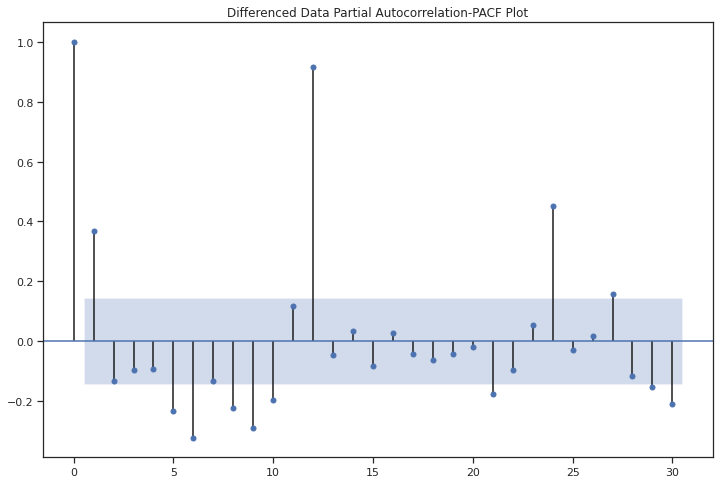

In [111]:
# ACF and Pacf plot on orginal time series
plot_acf(df['Sparkling'].dropna(),lags=30,title='Differenced Data Autocorrelation-ACF Plot')
plot_pacf(df['Sparkling'].dropna(),lags=30,title='Differenced Data Partial Autocorrelation-PACF Plot')
plt.show()

Seasonality is visible every 12 months in plots.

Since the original time series is non-stationary so we will do differencing using first order to get the sationary time series before building models.

##Check for stationarity of the whole Time Series data

Test for stationarity of the series for Sparkling Wines- Dicky Fuller test
H0: Series is non-stationary Ha: series is stationary

In [112]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

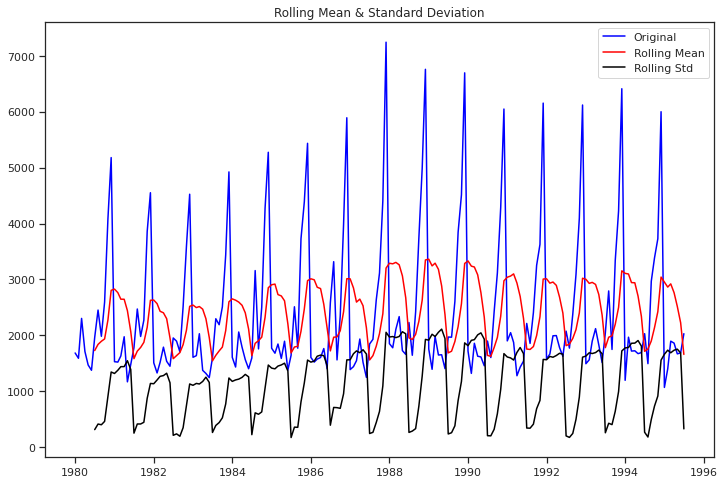

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [113]:
test_stationarity(df['Sparkling'])

Series is non-stationary with orginal data at alpha =0.05 as p -value is less than 0.05.
We see that at 5% significant level the Time Series is non-stationary.As the test statistics confirms that the p-value is not less than alpha level(0.05). It is confirmed that the test series for sparking wine is non stationary. Let us take a difference of order 1 and check whether the Time Series is stationary or not.

The plot shows that the rolling mean as well as the standard deviation is not constant, this gives us a hint of non-stationarity. Let us confirm it by using the Dicky Fuller Test.

The test shows that the test statistic is greater than the 1% value. This shows that we cannot reject the null hypothesis and the series is non-stationary.

#Lets try check for stationarity after taking first order differencing
Differencing method used to make the non-stationary time series of Sparkling wine to stationary

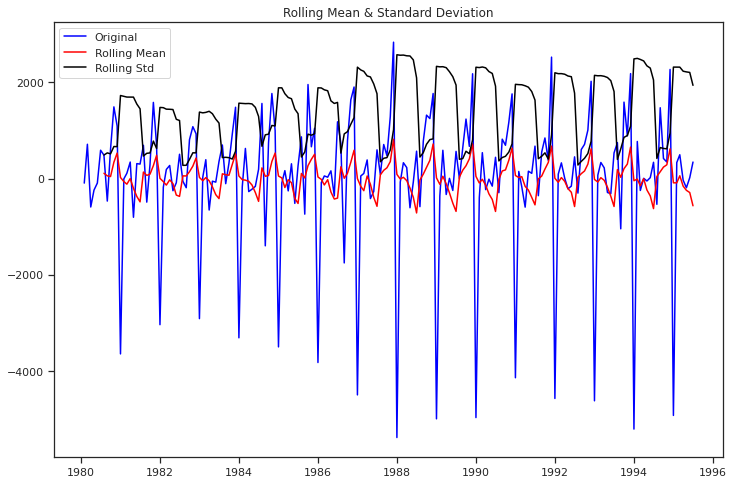

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [114]:
test_stationarity(df['Sparkling'].diff().dropna())

Series is stationary post 1st order differencing at alpha =0.05 and p-value is less than 0.05.

Inference: We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05. Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms

The plot shows that the rolling mean as well as the standard deviation is now constant, this gives us a hint of stationarity. Let us confirm it by using the Dicky Fuller Test.

We can see that the time series is now stationary, as the test statistic is much less than the 1 percent critical value. This means that we are more than 99% confident that the time series is stationary.

Now that we have removed the stationarity from our time series, we can make the ACF(Auto-correlation function) and PACF(Partial Auto-correlation function) plots which will help us decide the parameters of our Arima model.

#Model 8 Auto -ARIMA Model(Using AIC )

Series is not sationary and hence differencing would be required.For an Auto -Arima ,we calculate the best p and q parameters by looking at the lowest Akaike Information Criterion(AIC )values.

In [115]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [116]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [117]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.783097684156
ARIMA(0, 1, 3) - AIC:2233.016605138281
ARIMA(1, 1, 0) - AIC:2268.5280608424086
ARIMA(1, 1, 1) - AIC:2235.0139453505435
ARIMA(1, 1, 2) - AIC:2233.5976471194977
ARIMA(1, 1, 3) - AIC:2234.57414154599
ARIMA(2, 1, 0) - AIC:2262.0356000662723
ARIMA(2, 1, 1) - AIC:2232.3604898821764
ARIMA(2, 1, 2) - AIC:2210.6175078805536
ARIMA(2, 1, 3) - AIC:2229.3580937709444
ARIMA(3, 1, 0) - AIC:2259.471554724795
ARIMA(3, 1, 1) - AIC:2233.9217744559887
ARIMA(3, 1, 2) - AIC:2228.9276511439366
ARIMA(3, 1, 3) - AIC:2225.6615585249247


Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

In [118]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2210.617508
15,"(3, 1, 3)",2225.661559
14,"(3, 1, 2)",2228.927651
11,"(2, 1, 3)",2229.358094
9,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
3,"(0, 1, 3)",2233.016605
6,"(1, 1, 2)",2233.597647
13,"(3, 1, 1)",2233.921774
7,"(1, 1, 3)",2234.574142


ARIMA (2,1,2) has a lowest AIC values

##Summary of  Auto-ARIMA (2,1,2)

In [119]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.577
Date:                Mon, 04 Oct 2021   AIC                           2210.618
Time:                        10:21:06   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.627
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5859      0.516     10.820      0.000       4.574       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

Predict on the Test Set using this model and evaluate the model.

In [120]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [121]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.6964952596556


In [122]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2) Best AIC'])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1374.696495


##Model 8 - Auto ARIMA(2,1,2) using AIC plot

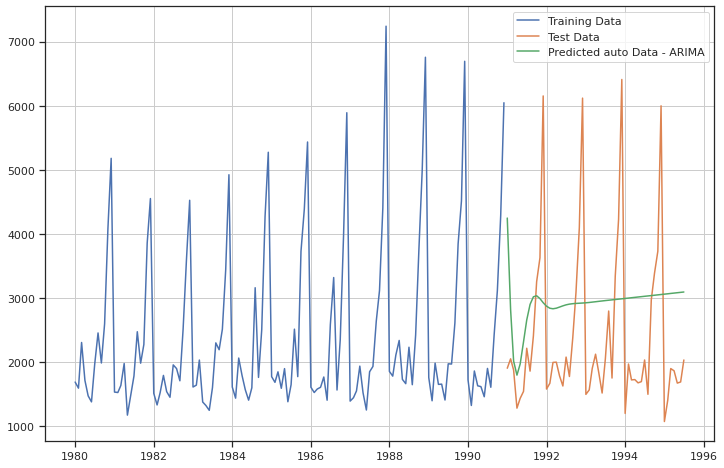

In [123]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted auto Data - ARIMA')
plt.legend(loc='best')
plt.grid();
# Not really its not taking trend .So we will go for sarima model

#Model 10 Automated Sarima Model (Using AIC)

As the data has seasonality .Lets build the model with SARIMA.For an Auto-SARIMA ,the parameters pdq and PDQ are selected based on lowest Akaike Information Criterion (AIC)values 

Setting the seasonality as 12 for the first iteration of the auto SARIMA mode

In [124]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [125]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [126]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684482
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239436
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138944
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791433
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158597898
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920817
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956651
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573758833
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837797
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193757358
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144334443
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177748
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085307839
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824313414
SARIMA(0, 1, 2

Top 5 best AIC values for Auto -Sarima Model

In [127]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934564
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340409


Lowest AIC value for SARIMA is (1,1,2)(1,0,2)12

#Summary of Sarimax(1,1,2)(1,0,2)12

In [128]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Mon, 04 Oct 2021   AIC                           1555.584
Time:                                    10:22:22   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

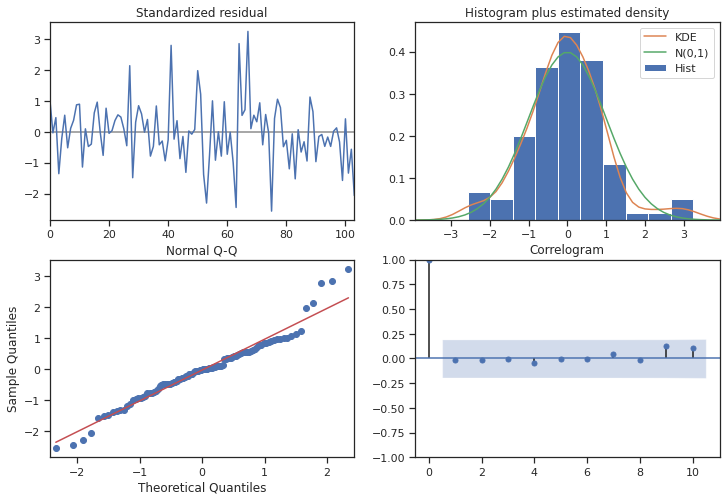

In [129]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using auto_sarima 12 model and evaluate the model.

In [130]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [131]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.401257,388.341132,566.266625,2088.535890
1,1315.149557,402.001939,527.240235,2103.058879
2,1621.594351,401.995550,833.697550,2409.491151
3,1598.902813,407.233028,800.740745,2397.064882
4,1392.703609,407.962500,593.111803,2192.295415


In [132]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6025130673597


In [133]:
temp_resultsDf_auto_SARIMA= pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12) Best AIC'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_SARIMA])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1374.696495
"SARIMA(1,1,2)(1,0,2,12) Best AIC",528.602513


#Model Plot for SARIMA (1,1,2)(1,0,2)12

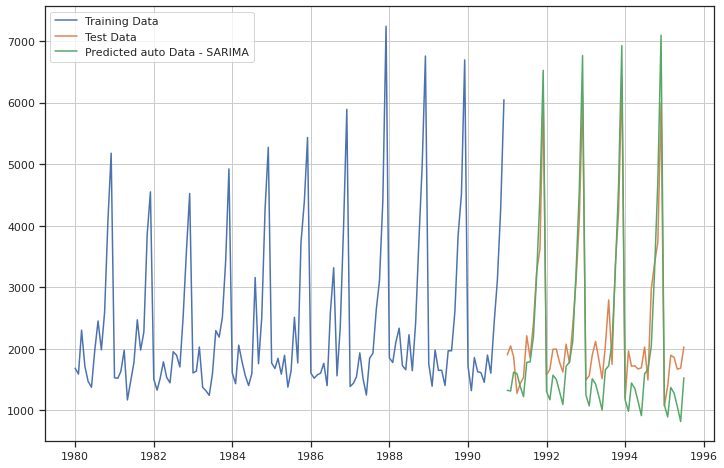

In [134]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted auto Data - SARIMA')
plt.legend(loc='best')
plt.grid();

Inference We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

The KDE plot of the residuals on the top right is almost similar with the normal distribution. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

We see that the RMSE value have reduced further when the seasonality parameter was changed to 12.

#ACF & PACF Plots

First order differenced time series ACF and PACF Plot 

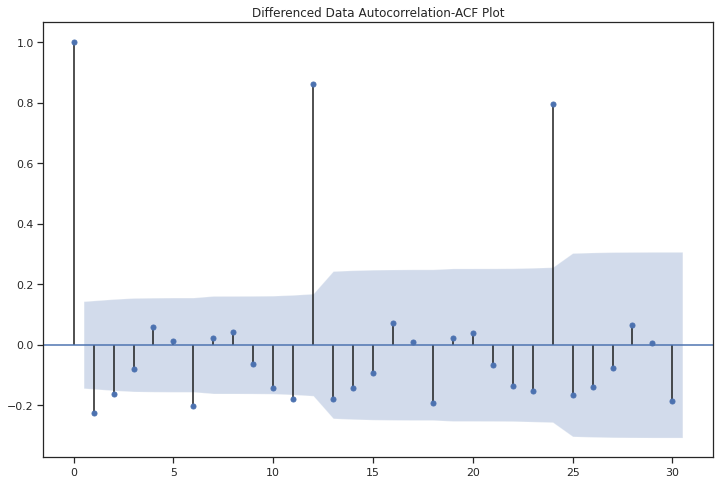

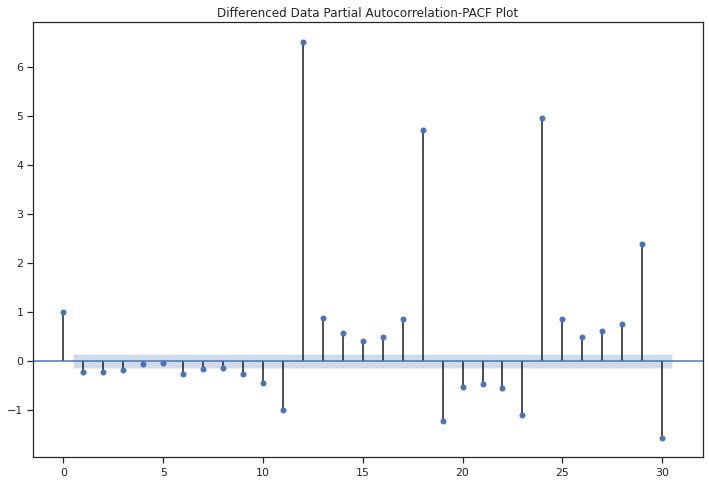

In [135]:
plot_acf(df['Sparkling'].diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation-ACF Plot')
plot_pacf(df['Sparkling'].diff(1).dropna(),lags=30,title='Differenced Data Partial Autocorrelation-PACF Plot')
plt.show()

Seasonality after certain 12 lags that is every 12 months is viisble in plots 

Inference using the first order differenced time series Acf and Pacf plot we will calculate the values of p,d,q .
Here p =3(PACF plot)3 lag are falling outside the significance blue band range,d=1(order of differenceing is 1 as original series was non-stationary but became stationary after differencing) ,and q=2(ACF plot)-two lags are falling above the significance blue band range.
Seasonality after 12 lags is seen in plots .ACF & PACF plot are done using 95% confidence interval bands.

#Model 8-ARIMA Model by picking p,d,q values from ACF & PACF plots
Summary of ARIMA (3,1,2) Model

In [136]:
from statsmodels.tsa.arima_model import ARIMA

In [137]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.180
Date:                Mon, 04 Oct 2021   AIC                           2228.928
Time:                        10:22:24   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9886      3.644      1.643      0.103      -1.154      13.131
ar.L1.D.Sparkling    -0.4420   8.18e-06  -5.41e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

#Predict on the Test Set using Manual Arima model and evaluate the model

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [140]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1379.1826761518028


#ARIMA Model Evaluation-Using ACF & PACF Plots

In [141]:
temp_resultsDfARIMA1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2) Looking at ACF & PACF plot'])


resultsDf = pd.concat([resultsDf,temp_resultsDfARIMA1])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1374.696495
"SARIMA(1,1,2)(1,0,2,12) Best AIC",528.602513
"ARIMA(3,1,2) Looking at ACF & PACF plot",1379.182676


#ARIMA Model Plot by picking p,d,q (3,1,2)using ACF & PACF Plots

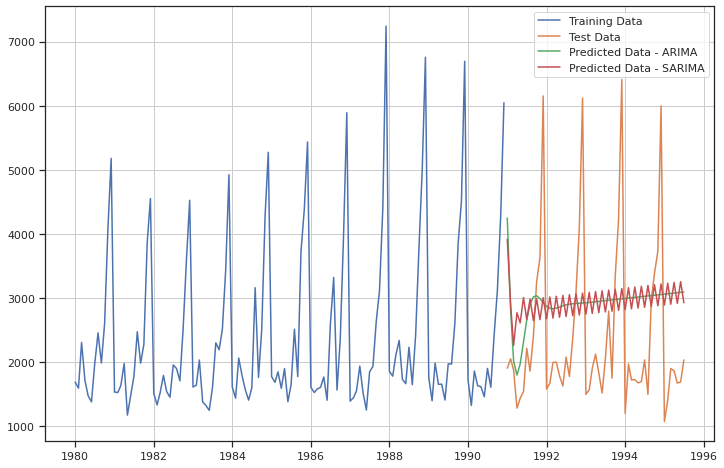

In [142]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - SARIMA')
# plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();
# SARIMA is able to replicate the pattern of data 

#Model 10-Sarima model by picking p,d,q & P,D ,Q values from ACF and PACF plot

Here p=3,d=1,q=2(kept same as ARIMA Model using Acf and Pacf plot) 
P =1,D=0,Q=1
Seasonality =12

#Summary of SARIMA model(3,1,2)(1,0,1)12

In [143]:
import statsmodels.api as sm

SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 0, 1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_12 = SARIMA_12.fit(maxiter=1000)
print(results_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 0, 1, 12)   Log Likelihood                -856.536
Date:                            Mon, 04 Oct 2021   AIC                           1729.072
Time:                                    10:22:30   BIC                           1751.101
Sample:                                         0   HQIC                          1738.014
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0786      1.352      0.058      0.954      -2.571       2.728
ar.L2         -0.1074      0.162   

#Model 11 Evaluation -SARIMA model by picking pdq and PDQ from ACF and PACF plots.

In [144]:
temp_results_Sarima_12 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots '] )


resultsDf = pd.concat([resultsDf,temp_results_Sarima_12])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1374.696495
"SARIMA(1,1,2)(1,0,2,12) Best AIC",528.602513
"ARIMA(3,1,2) Looking at ACF & PACF plot",1379.182676
"SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots",1379.182676


##Forecast Sparkling using Sarima Model on Whole data and forecast for coming 12 months.

Once we found the parameters that best fit to the data ,we are going to use these parameters to train of full Sparkling dataset and then forecast for 12 months in future.To fit a SARIMA model,we need to check for stationarity on whole data .

Stationarity Test on whole original dataset

The whole set is non-stationary at alpha =0.05 using Augmented Dickey Fuller Test.

Stationarity test post differencing of first order

The whole series is stationary at alpha =0.05 using Augmented Dickey Fuller test

#Forecast Sparkling Best fit SARIMA model
Best fit SARIMA model is using AIC is (1,1,2)(1,0,2)

##Summary of SARIMA(1,1,2)(1,0,2)12 on full data

(Here p,d ,q value is take from best auto SARIMA model with least AIC p=1,q=2,d=1 and the PDQ valuesas P=1,D=0 and Q=2 respectively.

In [145]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1,0,2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Mon, 04 Oct 2021   AIC                           2360.826
Time:                                    10:22:33   BIC                           2382.308
Sample:                                01-01-1980   HQIC                          2369.549
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6610      0.242     -2.734      0.006      -1.135      -0.187
ma.L1         -0.1801      0.219   

In [146]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [147]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1836.385189,379.709736,1092.167783,2580.602595
1995-09-01,2489.573456,384.474143,1736.017984,3243.128929
1995-10-01,3324.578835,384.579948,2570.815989,4078.341682
1995-11-01,4020.200103,386.338373,3262.990806,4777.409401
1995-12-01,6289.965288,386.392925,5532.649072,7047.281504


In [148]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9210723397371


In [149]:
temp_resultsDfSARIMA_Fulldata = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_Fulldata(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDfSARIMA_Fulldata])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1374.696495
"SARIMA(1,1,2)(1,0,2,12) Best AIC",528.602513
"ARIMA(3,1,2) Looking at ACF & PACF plot",1379.182676
"SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots",1379.182676
"SARIMA_Fulldata(1,1,2)(1,0,2,12)",539.921072


#95 and 99 Percent Cofidence Interval Table

In [150]:
pred_dynamic = results_full_data_model.get_prediction(start=pd.to_datetime('1980-01-01'), dynamic=True, full_results=True)

In [151]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [152]:
pred95 = results_full_data_model.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [153]:
forecast_fullmodel_autosarima = pred95.predicted_mean

#Plot for the Best Next 12 month Forecast along with confidence interval

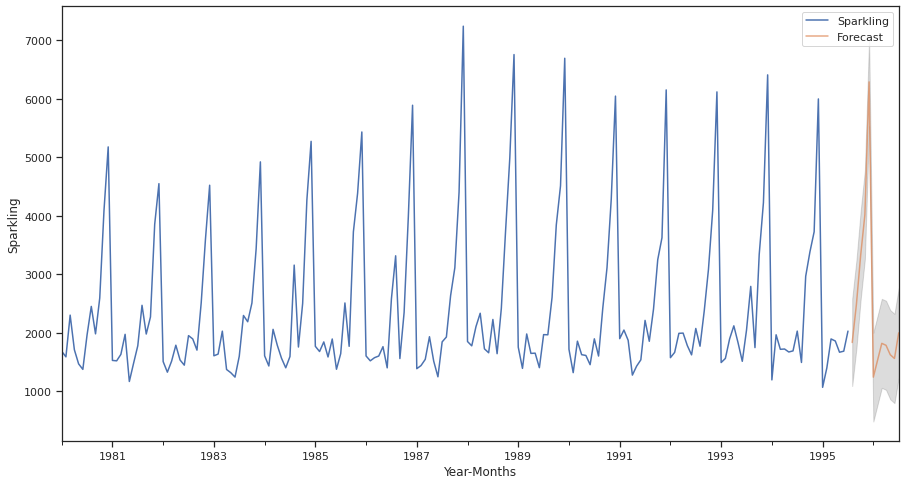

In [154]:
axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [155]:
resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1374.696495
"SARIMA(1,1,2)(1,0,2,12) Best AIC",528.602513
"ARIMA(3,1,2) Looking at ACF & PACF plot",1379.182676
"SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots",1379.182676
"SARIMA_Fulldata(1,1,2)(1,0,2,12)",539.921072



SARIMAX Diagnostic Plot on Full data

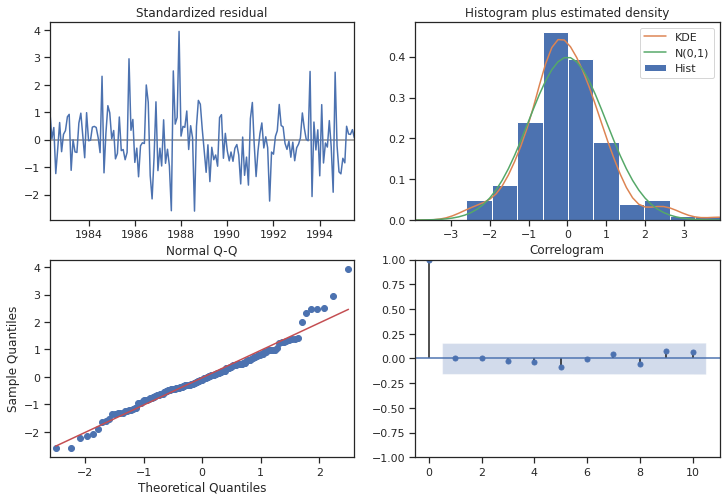

In [156]:
results_full_data_model.plot_diagnostics();

Inference 
We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero mean .If it is not that it signifies that the model can further improved and we repeat the process with the residuals .
In this case,our model dignostic suggests that the model residuals are normally distributed based on the following :

1.The KDE plot of the residuals on top right is almost similar with the normal distribution.
2.The qq-plot on the bottom lefts shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0,1).Again ,this is a strong indication that the residuals are normally distributed .
3.The residuals over time (top left plot) dont display any obvious seasonality and appear to be white noise .This is confirmed by the autocorrelation (i,.e. correlogram ) plot on the bottom right ,which shows that the time series residuals have low correlation with lagged versions of itself .


Those observations coupled with the fact that there are no spikes outside the insignificant zone for both Acf and PACF plots lead us to conclude that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values .

Conclusion :It seems for Sparkling dataset ARIMA auto fit model and Triple Exponential model has perdformed well.